In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

'''Reference:
    https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow
'''

'Reference:\n    https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow\n'

In [2]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.9.1


In [3]:
model_d=DenseNet169(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(20,activation='softmax')(x) #FC-layer, your number of the classes

In [4]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 8, 8, 480)   0           ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 8, 8, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 8, 8, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 8, 8, 128)    131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv5_block1_0_relu (Activatio  (None, 4, 4, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 4, 4, 128)    81920       ['conv5_block1_0_relu[0][0]']    
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block5_1_relu[0][0]']    
                                                                                                  
 conv5_block5_concat (Concatena  (None, 4, 4, 800)   0           ['conv5_block4_concat[0][0]',    
 te)                                                              'conv5_block5_2_conv[0][0]']    
                                                                                                  
 conv5_block6_0_bn (BatchNormal  (None, 4, 4, 800)   3200        ['conv5_block5_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 4, 4, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
                                                                                                  
 conv5_block10_0_relu (Activati  (None, 4, 4, 928)   0           ['conv5_block10_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block10_1_conv (Conv2D)  (None, 4, 4, 128)    118784      ['conv5_block10_0_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 4, 4, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block14_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block14_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_block18_concat (Concaten  (None, 4, 4, 1216)  0           ['conv5_block17_concat[0][0]',   
 ate)                                                             'conv5_block18_2_conv[0][0]']   
                                                                                                  
 conv5_block19_0_bn (BatchNorma  (None, 4, 4, 1216)  4864        ['conv5_block18_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block23_0_bn (BatchNorma  (None, 4, 4, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 4, 4, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, 4, 4, 128)    172032      ['conv5_block23_0_relu[0][0]']   
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block23_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block27_1_relu[0][0]']   
                                                                                                  
 conv5_block27_concat (Concaten  (None, 4, 4, 1504)  0           ['conv5_block26_concat[0][0]',   
 ate)     

 conv5_block31_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 4, 4, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
                                                                                                  
 conv5_block32_0_bn (BatchNorma  (None, 4, 4, 1632)  6528        ['conv5_block31_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block32_0_relu (Activati  (None, 4, 4, 1632)  0           ['conv5_block32_0_bn[0][0]']     
 on)                                                                                              
          

In [5]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True
    
#To avoid the problem of overfitting, avoid training the entire network. layer.trainable=False will freeze all the layers, keeping only the last eight layers (FC) to detect edges and blobs in the image. Once the model is fitted well, it can be fine-tuned by using layer.trainable=True.

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 8, 8, 480)   0           ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 8, 8, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 8, 8, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 8, 8, 128)    131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv5_block1_0_relu (Activatio  (None, 4, 4, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 4, 4, 128)    81920       ['conv5_block1_0_relu[0][0]']    
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block5_1_relu[0][0]']    
                                                                                                  
 conv5_block5_concat (Concatena  (None, 4, 4, 800)   0           ['conv5_block4_concat[0][0]',    
 te)                                                              'conv5_block5_2_conv[0][0]']    
                                                                                                  
 conv5_block6_0_bn (BatchNormal  (None, 4, 4, 800)   3200        ['conv5_block5_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 4, 4, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
                                                                                                  
 conv5_block10_0_relu (Activati  (None, 4, 4, 928)   0           ['conv5_block10_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block10_1_conv (Conv2D)  (None, 4, 4, 128)    118784      ['conv5_block10_0_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 4, 4, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block14_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block14_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_block18_concat (Concaten  (None, 4, 4, 1216)  0           ['conv5_block17_concat[0][0]',   
 ate)                                                             'conv5_block18_2_conv[0][0]']   
                                                                                                  
 conv5_block19_0_bn (BatchNorma  (None, 4, 4, 1216)  4864        ['conv5_block18_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block23_0_bn (BatchNorma  (None, 4, 4, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 4, 4, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, 4, 4, 128)    172032      ['conv5_block23_0_relu[0][0]']   
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block23_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block27_1_relu[0][0]']   
                                                                                                  
 conv5_block27_concat (Concaten  (None, 4, 4, 1504)  0           ['conv5_block26_concat[0][0]',   
 ate)     

 conv5_block31_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 4, 4, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
                                                                                                  
 conv5_block32_0_bn (BatchNorma  (None, 4, 4, 1632)  6528        ['conv5_block31_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block32_0_relu (Activati  (None, 4, 4, 1632)  0           ['conv5_block32_0_bn[0][0]']     
 on)                                                                                              
          

In [7]:
train_path = "C:/UNIFESP_Xray/Xray_train_224/"
imagePaths = sorted(map(int,list(os.listdir(train_path))))  #sorting by numbers

#see the classes(I stored in individual folder)
print(imagePaths)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [8]:
data=[]
labels=[]
random.seed(42)

for folder in imagePaths:
    if (folder != 3) and (folder != 14):
        path=sorted(list(os.listdir(train_path+str(folder))))   #folders are class names
        print(folder)

# Get the image array and label of every image
        for i in path:
            print(i)
            image = cv2.imread(train_path+str(folder)+'/'+i)
            image = cv2.resize(image, (128,128))
            image = img_to_array(image)
            data.append(image)
            l = folder
            labels.append(l)

print("len(labels)=",len(labels))
print(labels)

0
1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258-c.jpg
1.2.826.0.1.3680043.8.498.10107388868056003719871837223999138217-c.jpg
1.2.826.0.1.3680043.8.498.10181745787571911943303632087715815151-c.jpg
1.2.826.0.1.3680043.8.498.10406657579016312201439626146133412368-c.jpg
1.2.826.0.1.3680043.8.498.10819267902696312884313996336562550724-c.jpg
1.2.826.0.1.3680043.8.498.10952484934212595061043581682480297990-c.jpg
1.2.826.0.1.3680043.8.498.11062758981428680802704515078902697545-c.jpg
1.2.826.0.1.3680043.8.498.11121020226184051416110461667223845149-c.jpg
1.2.826.0.1.3680043.8.498.11227155170490832168629184106125649390-c.jpg
1.2.826.0.1.3680043.8.498.11430185427783861938088406669987177226-c.jpg
1.2.826.0.1.3680043.8.498.11479964994316715381867899205585900227-c.jpg
1.2.826.0.1.3680043.8.498.11666143137939211262402653035688444502-c.jpg
1.2.826.0.1.3680043.8.498.11782290406376640008140442719394036274-c.jpg
1.2.826.0.1.3680043.8.498.11917239920684965553324969391560337472-c.jpg
1.2.

1.2.826.0.1.3680043.8.498.88055284861184854928693676616485224405-c.jpg
1.2.826.0.1.3680043.8.498.96118226411137430398376066700344314247-c.jpg
1.2.826.0.1.3680043.8.498.96234511949925002869622218281217225340-c.jpg
1.2.826.0.1.3680043.8.498.98937080810498864792890762179962041125-c.jpg
2
1.2.826.0.1.3680043.8.498.10135999234351484423175004915526548194-c.jpg
1.2.826.0.1.3680043.8.498.10334200794500699374614895297621150305-c.jpg
1.2.826.0.1.3680043.8.498.10365514138672936500467175012351304416-c.jpg
1.2.826.0.1.3680043.8.498.10766182678440607097974548538894412972-c.jpg
1.2.826.0.1.3680043.8.498.10888192607734246062570568056428363685-c.jpg
1.2.826.0.1.3680043.8.498.11043610284585486304904225047602403894-c.jpg
1.2.826.0.1.3680043.8.498.11235855239046664015333328177072591600-c.jpg
1.2.826.0.1.3680043.8.498.11510235397020429669251783844827262618-c.jpg
1.2.826.0.1.3680043.8.498.11558866520660138931650976459278451094-c.jpg
1.2.826.0.1.3680043.8.498.11707990348620169509145053463963374569-c.jpg
1.2.

1.2.826.0.1.3680043.8.498.11803587057874004257305828672968120161-c.jpg
1.2.826.0.1.3680043.8.498.11988275118505930534806492100368138882-c.jpg
1.2.826.0.1.3680043.8.498.12010772705898316588000795421498587934-c.jpg
1.2.826.0.1.3680043.8.498.12272184327978690265685407997763484098-c.jpg
1.2.826.0.1.3680043.8.498.12992125746702555994344753616772572891-c.jpg
1.2.826.0.1.3680043.8.498.13281298272323278398504776292212185485-c.jpg
1.2.826.0.1.3680043.8.498.14765633785769314053681356981929937753-c.jpg
1.2.826.0.1.3680043.8.498.15757083169860526899067108643805557170-c.jpg
1.2.826.0.1.3680043.8.498.18036029086144657147100608611126845881-c.jpg
1.2.826.0.1.3680043.8.498.20995158262911622804072211155913817627-c.jpg
1.2.826.0.1.3680043.8.498.22713625834435507337367830106848392231-c.jpg
1.2.826.0.1.3680043.8.498.26526255029415965167857297935274092539-c.jpg
1.2.826.0.1.3680043.8.498.27219205416087124000038386779721604404-c.jpg
1.2.826.0.1.3680043.8.498.30964477695377833455817224754194395728-c.jpg
1.2.82

1.2.826.0.1.3680043.8.498.17745861058415991247777393206455732839-c.jpg
1.2.826.0.1.3680043.8.498.20918140292920524949530657853884334862-c.jpg
1.2.826.0.1.3680043.8.498.21739376742858908135232935836921176201-c.jpg
1.2.826.0.1.3680043.8.498.28177680221414266945867965558681545052-c.jpg
1.2.826.0.1.3680043.8.498.44009236627941226682073126521633294718-c.jpg
1.2.826.0.1.3680043.8.498.44985792809537660308321826332679605366-c.jpg
1.2.826.0.1.3680043.8.498.52369662527230429679937679591560328077-c.jpg
1.2.826.0.1.3680043.8.498.58213184485269370195749656926304054870-c.jpg
1.2.826.0.1.3680043.8.498.81506933133020096433590190057730092007-c.jpg
1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396-c.jpg
1.2.826.0.1.3680043.8.498.88201401328037140717800775648491689417-c.jpg
1.2.826.0.1.3680043.8.498.91186124289356455993894463009640956138-c.jpg
1.2.826.0.1.3680043.8.498.99608659712448440631921165785577511760-c.jpg
11
1.2.826.0.1.3680043.8.498.10242799675195671634897807131985000448-c.jpg
1.2

1.2.826.0.1.3680043.8.498.11854446559058671975456770431260197014-c.jpg
1.2.826.0.1.3680043.8.498.12890811955150015100621882246307330726-c.jpg
1.2.826.0.1.3680043.8.498.13265987223627772886524742315893273684-c.jpg
1.2.826.0.1.3680043.8.498.13350062826336212682074258655325809665-c.jpg
1.2.826.0.1.3680043.8.498.15144815417970827102709069064050334659-c.jpg
1.2.826.0.1.3680043.8.498.16843770282643889902244735451839441053-c.jpg
1.2.826.0.1.3680043.8.498.17017470244197780780004263173730715982-c.jpg
1.2.826.0.1.3680043.8.498.17101231703727385454872817437827484460-c.jpg
1.2.826.0.1.3680043.8.498.17608458725079283017890142258369928003-c.jpg
1.2.826.0.1.3680043.8.498.17774885662473266087621382248875792158-c.jpg
1.2.826.0.1.3680043.8.498.27877998329001057521508759287879878825-c.jpg
1.2.826.0.1.3680043.8.498.33812846065108577770560797178913477933-c.jpg
1.2.826.0.1.3680043.8.498.38872257772551990149437929738103446010-c.jpg
1.2.826.0.1.3680043.8.498.38885686657113546181222523326390624482-c.jpg
1.2.82

1.2.826.0.1.3680043.8.498.67498246555904727222770760880185608565-c.jpg
1.2.826.0.1.3680043.8.498.72076850975907007834224602949270463597-c.jpg
1.2.826.0.1.3680043.8.498.73445894389935034071849451944583904490-c.jpg
1.2.826.0.1.3680043.8.498.75068238436974760005302080353720252096-c.jpg
1.2.826.0.1.3680043.8.498.75946763178249306798650633431805526286-c.jpg
1.2.826.0.1.3680043.8.498.82416075832064488098954782751053980478-c.jpg
1.2.826.0.1.3680043.8.498.90139901684676817538598240609515128821-c.jpg
1.2.826.0.1.3680043.8.498.90617059056548212763113895515703343197-c.jpg
1.2.826.0.1.3680043.8.498.93070245357586434022109778511987636478-c.jpg
1.2.826.0.1.3680043.8.498.97513821764365418060171826106015715485-c.jpg
17
1.2.826.0.1.3680043.8.498.10121269997000927609159070327294073193-c.jpg
1.2.826.0.1.3680043.8.498.10448296949165400398949546446151357427-c.jpg
1.2.826.0.1.3680043.8.498.10503618535408607283178540130507830424-c.jpg
1.2.826.0.1.3680043.8.498.10950440235762027870830738147373259538-c.jpg
1.2

In [9]:
# Use the reciprocal of every single class as the weights 

print(pd.DataFrame(labels).value_counts(sort=False))
weights=np.reciprocal(np.array(pd.DataFrame(labels).value_counts(sort=False))/1000) #reciprocal(倒數)needs input less than 1
print("weight list:",weights)


#try sample weight to balance the training

0      80
1      41
2      77
4       9
5      23
6      70
7      15
8      12
9      31
10     19
11    102
12     19
13     39
15     67
16     40
17     23
18     10
19      7
20     15
21     63
dtype: int64
weight list: [ 12.5         24.3902439   12.98701299 111.11111111  43.47826087
  14.28571429  66.66666667  83.33333333  32.25806452  52.63157895
   9.80392157  52.63157895  25.64102564  14.92537313  25.
  43.47826087 100.         142.85714286  66.66666667  15.87301587]


In [10]:
data = np.array(data, dtype="float32") / 255.0   #normaliztion
labels = np.array(labels)
mlb = LabelBinarizer()
onehot_labels = mlb.fit_transform(labels)     #Binarize labels in a one-vs-all fashion. one-hot encoding
print(onehot_labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [11]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,onehot_labels,test_size=0.25,random_state=42)  #test 25%
sample_weight = []
for i in range(len(ytrain)):
    for j in range(len(weights)):
        if labels[i] == j:
            sample_weight.append(weights[j])
#             print("label[i]",labels[i])
#             print("weights[j]",weights[j])
# xtrain = data
# ytrain = labels #change back all data, use all data to train

print(xtrain.shape, xtest.shape)

(571, 128, 128, 3) (191, 128, 128, 3)


In [12]:
#Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

# Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint('DenseNet169_20_weight.h5', verbose=1, save_best_only=True)

# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(zoom_range = 0.5, horizontal_flip=True, shear_range=0.5)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128, sample_weight=sample_weight),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/50

Epoch 1: val_loss improved from inf to 2.56899, saving model to DenseNet169_20_weight.h5
4/4 - 168s - loss: 128.5567 - accuracy: 0.1151 - val_loss: 2.5690 - val_accuracy: 0.2347 - lr: 0.0010 - 168s/epoch - 42s/step
Epoch 2/50

Epoch 2: val_loss improved from 2.56899 to 2.42575, saving model to DenseNet169_20_weight.h5
4/4 - 108s - loss: 83.5352 - accuracy: 0.3093 - val_loss: 2.4257 - val_accuracy: 0.2960 - lr: 0.0010 - 108s/epoch - 27s/step
Epoch 3/50

Epoch 3: val_loss improved from 2.42575 to 2.27154, saving model to DenseNet169_20_weight.h5
4/4 - 111s - loss: 57.0421 - accuracy: 0.5430 - val_loss: 2.2715 - val_accuracy: 0.3538 - lr: 0.0010 - 111s/epoch - 28s/step
Epoch 4/50

Epoch 4: val_loss improved from 2.27154 to 1.99106, saving model to DenseNet169_20_weight.h5
4/4 - 105s - loss: 47.9093 - accuracy: 0.5824 - val_loss: 1.9911 - val_accuracy: 0.4238 - lr: 0.0010 - 105s/epoch - 26s/step
Epoch 5/50

Epoch 5: val_loss improved from 1.99106 to 1.72188, saving model to Den

4/4 - 63s - loss: 13.1990 - accuracy: 0.8375 - val_loss: 0.2088 - val_accuracy: 0.9317 - lr: 0.0010 - 63s/epoch - 16s/step
Epoch 38/50

Epoch 38: val_loss did not improve from 0.17578
4/4 - 61s - loss: 14.1789 - accuracy: 0.8239 - val_loss: 0.1832 - val_accuracy: 0.9317 - lr: 0.0010 - 61s/epoch - 15s/step
Epoch 39/50

Epoch 39: val_loss improved from 0.17578 to 0.16688, saving model to DenseNet169_20_weight.h5
4/4 - 65s - loss: 13.6418 - accuracy: 0.8578 - val_loss: 0.1669 - val_accuracy: 0.9475 - lr: 0.0010 - 65s/epoch - 16s/step
Epoch 40/50

Epoch 40: val_loss did not improve from 0.16688
4/4 - 63s - loss: 12.8330 - accuracy: 0.8578 - val_loss: 0.1765 - val_accuracy: 0.9405 - lr: 0.0010 - 63s/epoch - 16s/step
Epoch 41/50

Epoch 41: val_loss did not improve from 0.16688
4/4 - 66s - loss: 11.1770 - accuracy: 0.8594 - val_loss: 0.1781 - val_accuracy: 0.9457 - lr: 0.0010 - 66s/epoch - 16s/step
Epoch 42/50

Epoch 42: val_loss did not improve from 0.16688
4/4 - 63s - loss: 12.5382 - accura

In [13]:
# Generates output predictions for the input samples. Computation is done in batches.
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

6/6 [==============================] - 20s 2s/step
Total-test-data; 191 	accurately-predicted-data: 153 	 wrongly-predicted-data:  38
Accuracy: 80.105 %


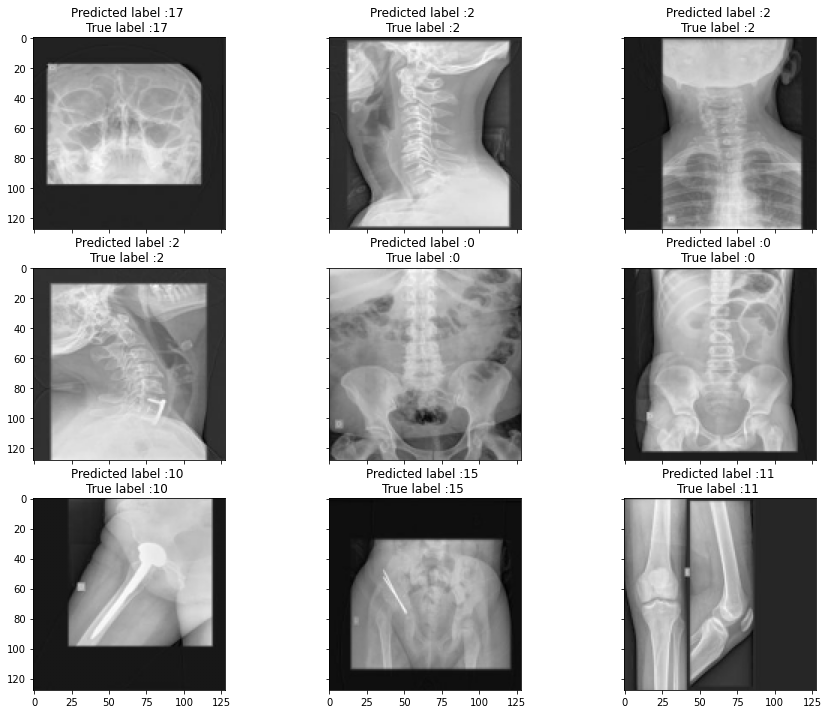

In [14]:
# Show some random accurately predicted samples
label=['0 ','1 ','2 ','4 ','5 ','6 ','7 ','8 ','9 ','10 ','11 ','12 ','13 ','15 ','16 ','17 ','18 ','19 ','20 ','21 '] #the kaggle submission needs str in the csv
imidx = random.sample(accurateindex, k=9)   #random.sample(sequence, k), k: An Integer value, it specify the length of a sample.

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()

6/6 [==============================] - 12s 2s/step


Text(0.5, 145.31999999999996, 'Predicted')

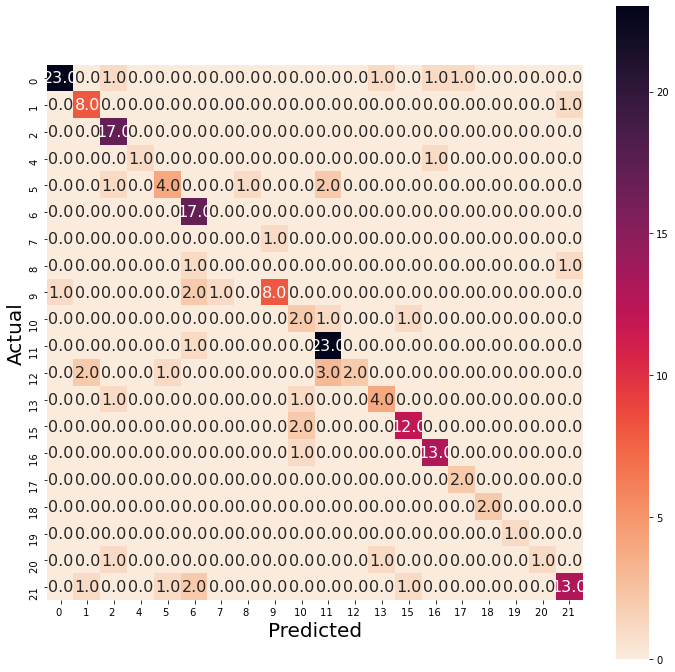

In [15]:
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [16]:
loaded_model = tensorflow.keras.models.load_model('DenseNet169_20_weight.h5')

In [17]:
test_pd = pd.read_csv("C:/UNIFESP_Xray/Xray_small/sample_submission.csv")

test_path = "C:/UNIFESP_Xray/Xray_small_jpg/test/"

submission_data = []
submission_labels = []
print(type(submission_data))

for test_id in test_pd['SOPInstanceUID']:
    test_img = cv2.imread(test_path+test_id+"-c.jpg")
    test_img = cv2.resize(test_img, (128,128))
    test_img = img_to_array(test_img)
    submission_data.append(test_img)

submission_data = np.array(submission_data, dtype="float32") / 255.0   #normaliztion
    
submission_preds = loaded_model.predict(submission_data)
print("raw predicted arrays:",submission_preds)

submission_labels = [label[index]+" " for index in np.argmax(submission_preds, axis=1)]

print("maximum probability:",submission_labels)

test_pd['Target'] = submission_labels
test_pd.to_csv("C:/Users/janic/Desktop/DSFederal/VGG19_3_weight_DenseNet169_20_weight.csv", index=False)

<class 'list'>
24/24 [==============================] - 61s 2s/step
raw predicted arrays: [[1.0264006e-06 1.7419431e-04 1.3613981e-05 ... 4.4595719e-05
  1.8307039e-05 9.4808796e-03]
 [1.0241191e-03 5.5810528e-06 9.8912954e-01 ... 1.8237632e-05
  8.2058432e-03 8.6573527e-06]
 [1.5981835e-06 3.1791057e-03 4.2453023e-05 ... 4.3067972e-05
  2.7297849e-05 3.8231218e-01]
 ...
 [1.1741522e-02 1.7534843e-05 4.8828195e-03 ... 1.6284372e-03
  9.2013335e-01 2.9110403e-03]
 [9.1974615e-11 7.8119289e-09 1.6014566e-10 ... 1.2040458e-09
  2.5621987e-09 9.9998474e-01]
 [1.4455600e-02 5.3533124e-05 8.8007917e-04 ... 4.3691674e-04
  3.0030205e-04 4.4373829e-07]]
maximum probability: ['6  ', '2  ', '9  ', '20  ', '16  ', '0  ', '20  ', '1  ', '16  ', '5  ', '0  ', '16  ', '0  ', '2  ', '11  ', '7  ', '2  ', '16  ', '21  ', '2  ', '2  ', '16  ', '2  ', '2  ', '0  ', '21  ', '11  ', '20  ', '11  ', '0  ', '16  ', '1  ', '20  ', '20  ', '2  ', '11  ', '20  ', '11  ', '2  ', '0  ', '9  ', '5  ', '2  ', '0  